# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observation 1: Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere. This is because teh Southern Hemisphere has significantly more ocean and much less land; water heats up and cools down more slowly than land.

Observation 2: Highest temperature is found at 0 latituted and as the latitude increases or decreases, temperature drops. This happens as equatorial region receives sunlight straight with less or no angle due to curvature shape of the earth.

Observation 3: Latitude doesn't have a storng influence on wind speed. The speed of the wind is controlled by the strength of the air pressure gradient, the stonger the pressure gradient the higher the higher the wind speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import datetime
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low =-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
                
# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do the following...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response['name'])
        cloudiness_list.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response['main']['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
    
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : busselton
Processing Record 2 of Set 1 : cape town
Processing Record 3 of Set 1 : new norfolk
Processing Record 4 of Set 1 : surt
Processing Record 5 of Set 1 : hermanus
Processing Record 6 of Set 1 : santa cruz
Processing Record 7 of Set 1 : malinovskiy
Processing Record 8 of Set 1 : derzhavinsk
Processing Record 9 of Set 1 : barra do bugres
Processing Record 10 of Set 1 : dingle
Processing Record 11 of Set 1 : carnarvon
Processing Record 12 of Set 1 : avarua
Processing Record 13 of Set 1 : niesky
Processing Record 14 of Set 1 : bredasdorp
Processing Record 15 of Set 1 : puerto ayora
Processing Record 16 of Set 1 : ushuaia
City not found. Skipping...
Processing Record 17 of Set 1 : onguday
Processing Record 18 of Set 1 : hobart
Processing Record 19 of Set 1 : georgetown
Processing Record 20 of Set 1 : porto velho
Processing Record 21 of Set 1 : hasaki
Processing Record 22 of Set 1 : liling
Processin

Processing Record 36 of Set 4 : slavonski brod
Processing Record 37 of Set 4 : kurtamysh
Processing Record 38 of Set 4 : fairbanks
Processing Record 39 of Set 4 : tanout
Processing Record 40 of Set 4 : yellowknife
Processing Record 41 of Set 4 : mimongo
Processing Record 42 of Set 4 : touros
Processing Record 43 of Set 4 : fortuna
Processing Record 44 of Set 4 : nouadhibou
Processing Record 45 of Set 4 : athabasca
Processing Record 46 of Set 4 : jacareacanga
Processing Record 47 of Set 4 : korla
Processing Record 48 of Set 4 : morrope
Processing Record 49 of Set 4 : silale
Processing Record 50 of Set 4 : qaanaaq
Processing Record 0 of Set 5 : sao joao da barra
Processing Record 1 of Set 5 : nikki
City not found. Skipping...
Processing Record 2 of Set 5 : komsomolskiy
City not found. Skipping...
Processing Record 3 of Set 5 : kaitangata
Processing Record 4 of Set 5 : corrente
Processing Record 5 of Set 5 : westport
Processing Record 6 of Set 5 : luderitz
Processing Record 7 of Set 5 : b

Processing Record 20 of Set 8 : alvaraes
Processing Record 21 of Set 8 : byron bay
City not found. Skipping...
Processing Record 22 of Set 8 : la ronge
Processing Record 23 of Set 8 : sinazongwe
Processing Record 24 of Set 8 : east london
Processing Record 25 of Set 8 : zhuhai
Processing Record 26 of Set 8 : sungurlu
Processing Record 27 of Set 8 : santa barbara
Processing Record 28 of Set 8 : masallatah
Processing Record 29 of Set 8 : amberley
Processing Record 30 of Set 8 : waipawa
Processing Record 31 of Set 8 : batticaloa
Processing Record 32 of Set 8 : coihueco
Processing Record 33 of Set 8 : el escorial
Processing Record 34 of Set 8 : bilma
Processing Record 35 of Set 8 : faanui
Processing Record 36 of Set 8 : serebryansk
Processing Record 37 of Set 8 : yar-sale
Processing Record 38 of Set 8 : klaksvik
Processing Record 39 of Set 8 : heishan
Processing Record 40 of Set 8 : basoko
Processing Record 41 of Set 8 : lagunas
Processing Record 42 of Set 8 : iqaluit
Processing Record 43 

Processing Record 3 of Set 12 : simplicio mendes
Processing Record 4 of Set 12 : dicabisagan
Processing Record 5 of Set 12 : kulhudhuffushi
Processing Record 6 of Set 12 : maykor
Processing Record 7 of Set 12 : wuwei
Processing Record 8 of Set 12 : chiredzi
Processing Record 9 of Set 12 : eresos
Processing Record 10 of Set 12 : winnemucca
Processing Record 11 of Set 12 : oranjemund
Processing Record 12 of Set 12 : felipe carrillo puerto
Processing Record 13 of Set 12 : sistranda
Processing Record 14 of Set 12 : steamboat springs
----------------------------
Data Retrieval Complete
----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create initial dictionary with API calls
weather_dict = pd.DataFrame ({"City":city_name_list,
                            "Cloudiness":cloudiness_list,
                            "Country" : country_list,
                            "Date" : date_list,
                            "Humidity":humidity_list,
                            "Lat":lat_list,
                            "Lng":lng_list,
                            "Max Temp":max_temp_list,
                            "Wind Speed":wind_speed_list})

In [6]:
weather_dict.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

In [7]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,64,AU,1607564060,9,-33.65,115.33,93.99,11.52
1,Cape Town,0,ZA,1607563822,88,-33.93,18.42,62.60,9.17
2,New Norfolk,72,AU,1607564067,46,-42.78,147.06,62.01,1.99
3,Sirte,0,LY,1607563908,58,31.21,16.59,61.41,16.89
4,Hermanus,40,ZA,1607564062,96,-34.42,19.23,57.99,1.01
...,...,...,...,...,...,...,...,...,...
570,Winnemucca,1,US,1607563858,54,40.97,-117.74,30.20,6.93
571,Oranjemund,58,NA,1607564104,92,-28.55,16.43,60.80,3.89
572,Felipe Carrillo Puerto,99,MX,1607564308,79,19.58,-88.05,67.14,3.38
573,Sistranda,0,NO,1607564084,64,63.73,8.83,37.40,14.99


In [8]:
weather_dict.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,575.000000,5.750000e+02,575.000000,575.000000,575.000000,575.000000,575.000000
mean,53.928696,1.607564e+09,75.980870,20.299687,18.853809,52.310730,7.663652
std,40.416130,1.215517e+02,18.225398,32.905451,90.090785,27.777447,5.569354
min,0.000000,1.607564e+09,8.000000,-54.800000,-179.170000,-37.750000,0.110000
25%,1.000000,1.607564e+09,68.000000,-6.220000,-59.795000,33.405000,3.360000
50%,68.000000,1.607564e+09,81.000000,25.260000,22.790000,60.600000,6.240000
75%,93.500000,1.607564e+09,89.000000,47.660000,99.485000,75.200000,10.580000
max,100.000000,1.607564e+09,100.000000,78.220000,179.320000,96.800000,35.570000


In [9]:
# Save city data into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
dry_cities = weather_dict[weather_dict["Humidity"]<=100]
dry_cities.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,575.000000,5.750000e+02,575.000000,575.000000,575.000000,575.000000,575.000000
mean,53.928696,1.607564e+09,75.980870,20.299687,18.853809,52.310730,7.663652
std,40.416130,1.215517e+02,18.225398,32.905451,90.090785,27.777447,5.569354
min,0.000000,1.607564e+09,8.000000,-54.800000,-179.170000,-37.750000,0.110000
25%,1.000000,1.607564e+09,68.000000,-6.220000,-59.795000,33.405000,3.360000
50%,68.000000,1.607564e+09,81.000000,25.260000,22.790000,60.600000,6.240000
75%,93.500000,1.607564e+09,89.000000,47.660000,99.485000,75.200000,10.580000
max,100.000000,1.607564e+09,100.000000,78.220000,179.320000,96.800000,35.570000


In [11]:
#  Get the indices of cities that have humidity over 100%.
high_humid = weather_dict.index[weather_dict["Humidity"]>100].tolist()

print(f"There are {len(high_humid)} cities with over 100% humidity")

There are 0 cities with over 100% humidity


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_dict.drop(labels=high_humid,inplace=False)
clean_city_data.head()
clean_city_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,575.000000,5.750000e+02,575.000000,575.000000,575.000000,575.000000,575.000000
mean,53.928696,1.607564e+09,75.980870,20.299687,18.853809,52.310730,7.663652
std,40.416130,1.215517e+02,18.225398,32.905451,90.090785,27.777447,5.569354
min,0.000000,1.607564e+09,8.000000,-54.800000,-179.170000,-37.750000,0.110000
25%,1.000000,1.607564e+09,68.000000,-6.220000,-59.795000,33.405000,3.360000
50%,68.000000,1.607564e+09,81.000000,25.260000,22.790000,60.600000,6.240000
75%,93.500000,1.607564e+09,89.000000,47.660000,99.485000,75.200000,10.580000
max,100.000000,1.607564e+09,100.000000,78.220000,179.320000,96.800000,35.570000


In [13]:
date = date.today()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

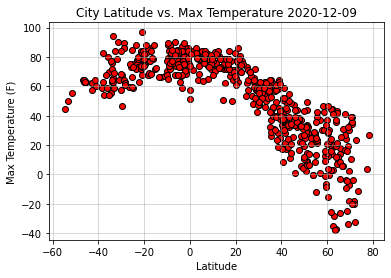

In [14]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "red", edgecolor = "black")

# Set title
plt.title(f"City Latitude vs. Max Temperature {date}")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output_data/Images/City Latitude vs Max Temperature.png")

Highest temperature is found at 0 latitude and as the latitude increases or decreases, temperature drops.

## Latitude vs. Humidity Plot

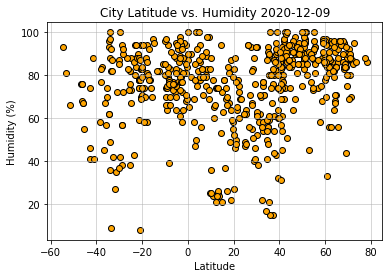

In [15]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "orange", edgecolor = "black")

# Set title
plt.title(f"City Latitude vs. Humidity {date}")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

# Save the plotted figure as png
plt.savefig("output_data/Images/City Latitude vs Humidity.png")

Polar regions have lower humidity and as latitude gets higher, humidity gets higher in the southern hemisphere.

## Latitude vs. Cloudiness Plot

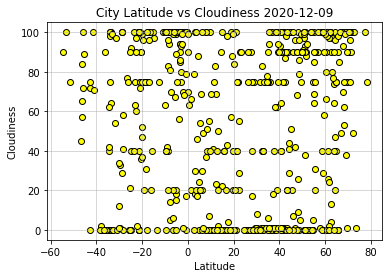

In [16]:
# Create a Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "yellow", edgecolor= "black")

# Set title
plt.title(f"City Latitude vs Cloudiness {date}")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

# Save the plotted figure as png
plt.savefig("output_data/Images/City Latitude vs Cloudiness.png")

Cloudiness data is widely spread across the latitude.

## Latitude vs. Wind Speed Plot

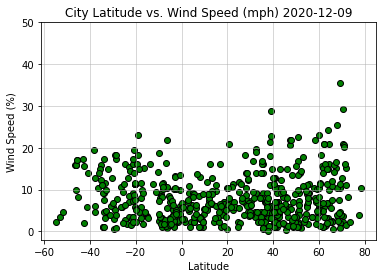

In [17]:
# Create Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor ="green", edgecolor = "black")

# Set title
plt. title(f"City Latitude vs. Wind Speed (mph) {date}")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle="-", linewidth=1, alpha =0.5)

# Save the plotted figure as png
plt.savefig("output_data/Images/City Latitude vs Wind Speed (mph).png")

Wind speed data is widely spread across the latitude

## Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lng"] < 0]

In [19]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r squared is : {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) =  linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15, color ="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared is : -0.85


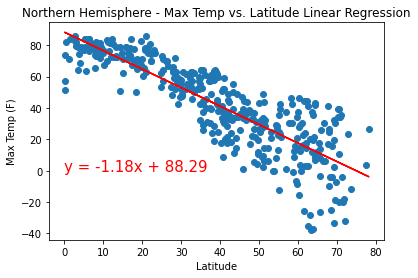

In [31]:
# Call on function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call on function #2
annotate(equation, 0, 0)

#Set a title#
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

#Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure as png
plt.savefig("output_data/Images/Northern Hemisphere - Max Temp vs Latitude Linear Regression.png")

There is a strong negative correlation between latitude and max temperature for the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared is : -0.76


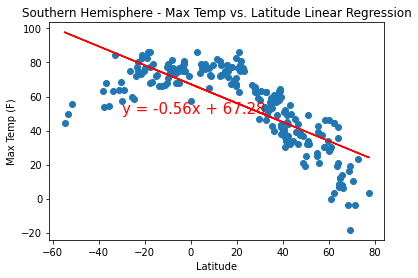

In [21]:
# Call on function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call on function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure as png
plt.savefig("output_data/Images/Southern Hemisphere - Max Temp vs Latitude Linear Regression.png")

There is a negative correlation between latitude and max temperature for southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared is : 0.35


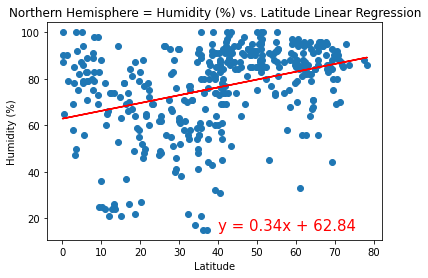

In [22]:
# Call on function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call on function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere = Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Images/Northern Hemisphere - Humidity (%) vs Latitude Linear Regression.png")
                                                                

There is a moderate positive correlation between latitude and humidity for northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared is : -0.07


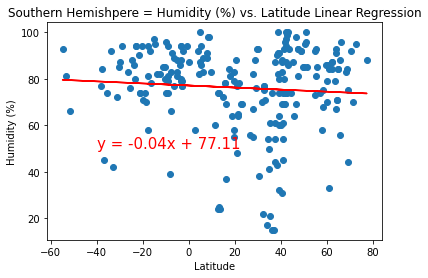

In [23]:
# Call on function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call on function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemishpere = Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure in png
plt.savefig("output_data/Images/Southern Hemisphere - Humidity (%) vs Latitude Linear Regression.png")

There is a moderate positive correlation between latitude and humidity for the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared is : 0.29


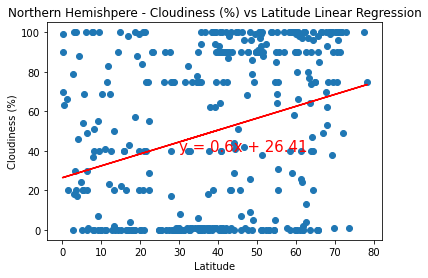

In [24]:
# Call on function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call on function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemishpere - Cloudiness (%) vs Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure as a png
plt.savefig("output_data/Images/Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression.png")

There is a weak positive correlation between latitude and cloudiness for the norhtern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared is : 0.06


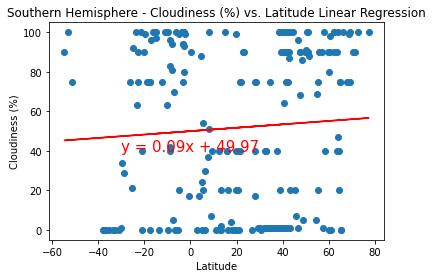

In [25]:
# Call function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call on function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure as png
plt.savefig("output_data/Images/Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression.png")

There is a weak positive correlation between latitude and cloudiness for the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared is : 0.2


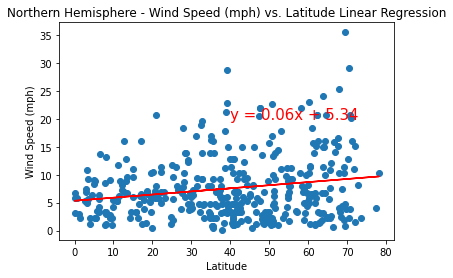

In [26]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Images/Northern Hemisphere - Wind Speed vs Latitude Linear Regression.png")

There is a weak positive correlation between latitude and wind speed for northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared is : 0.11


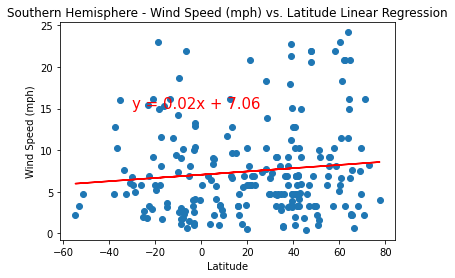

In [27]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Images/Southern Hemisphere - Wind Speed vs Latitude Linear Regression.png")

There is a weak negative correlation between latitude and wind speed for the southern hemisphere.